# importing required modules 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model 

# loading the data set of Iris

In [2]:
data_frame=pd.read_csv("/home/bot/Desktop/intern/datasets/Iris.csv")

In [3]:
data_frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# learning about data set 


Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements . 

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data_frame.count() # tells the number of columns which are non empty

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [6]:
data_frame.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data_frame.isna().count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

from the above information we can tell that there are no null values

## since the ML algorithm cannot understand the strings {the Species column}

SO we canvert them to integers

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()


In [10]:
data_frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
data_frame['Species']=le.fit_transform(data_frame['Species'])
data_frame


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Here according to the  encoding we have 
0 represents   Iris-setosa
1 represents   Iris-versicolor
2 represents   Iris-virginica

> since we dont want id number we can drop id 

In [12]:
data_frame.drop("Id",axis="columns",inplace=True)

In [13]:
data_frame

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Data Visualization

Text(0.5, 1.0, 'Sepal Length  VS Species')

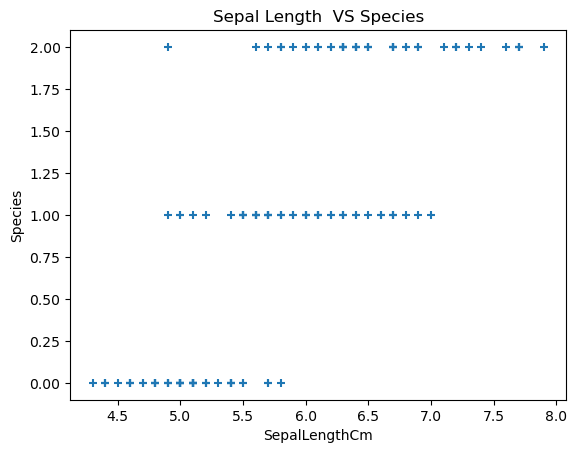

In [14]:
plt.scatter(data_frame['SepalLengthCm'],data_frame['Species'],marker='+')
plt.xlabel('SepalLengthCm')
plt.ylabel('Species')
plt.title('Sepal Length  VS Species')


Text(0.5, 1.0, 'Sepal Width  VS Species')

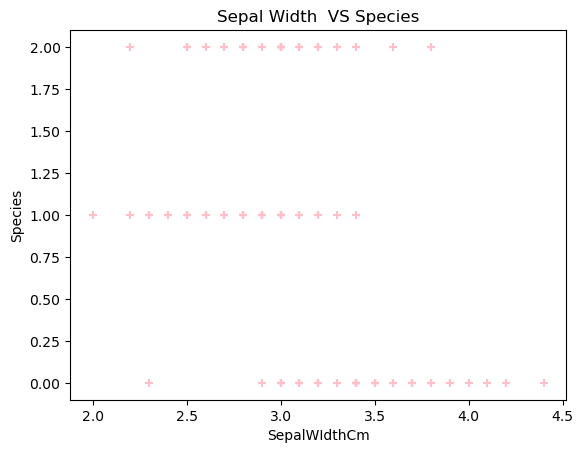

In [15]:
plt.scatter(data_frame['SepalWidthCm'],data_frame['Species'],marker="+",color="pink")
plt.xlabel('SepalWIdthCm')
plt.ylabel('Species')
plt.title('Sepal Width  VS Species')


Text(0.5, 1.0, 'Petal Length  VS Species')

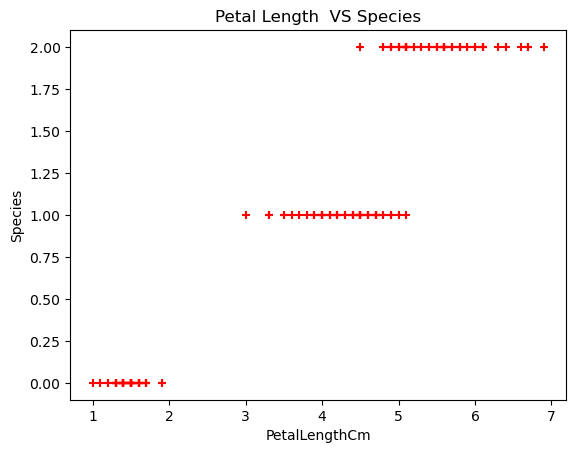

In [16]:
plt.scatter(data_frame['PetalLengthCm'],data_frame['Species'],marker="+",color="red")
plt.xlabel('PetalLengthCm')
plt.ylabel('Species')
plt.title('Petal Length  VS Species')


Text(0.5, 1.0, 'Petal Width  VS Species')

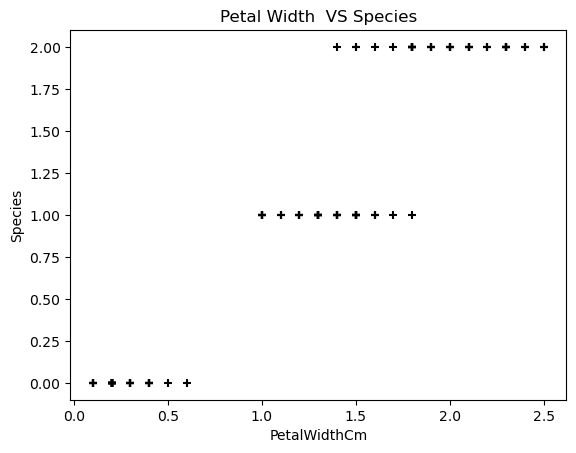

In [28]:
plt.scatter(data_frame['PetalWidthCm'],data_frame['Species'],marker="+",color="black")
plt.xlabel('PetalWidthCm')
plt.ylabel('Species')

plt.title('Petal Width  VS Species')


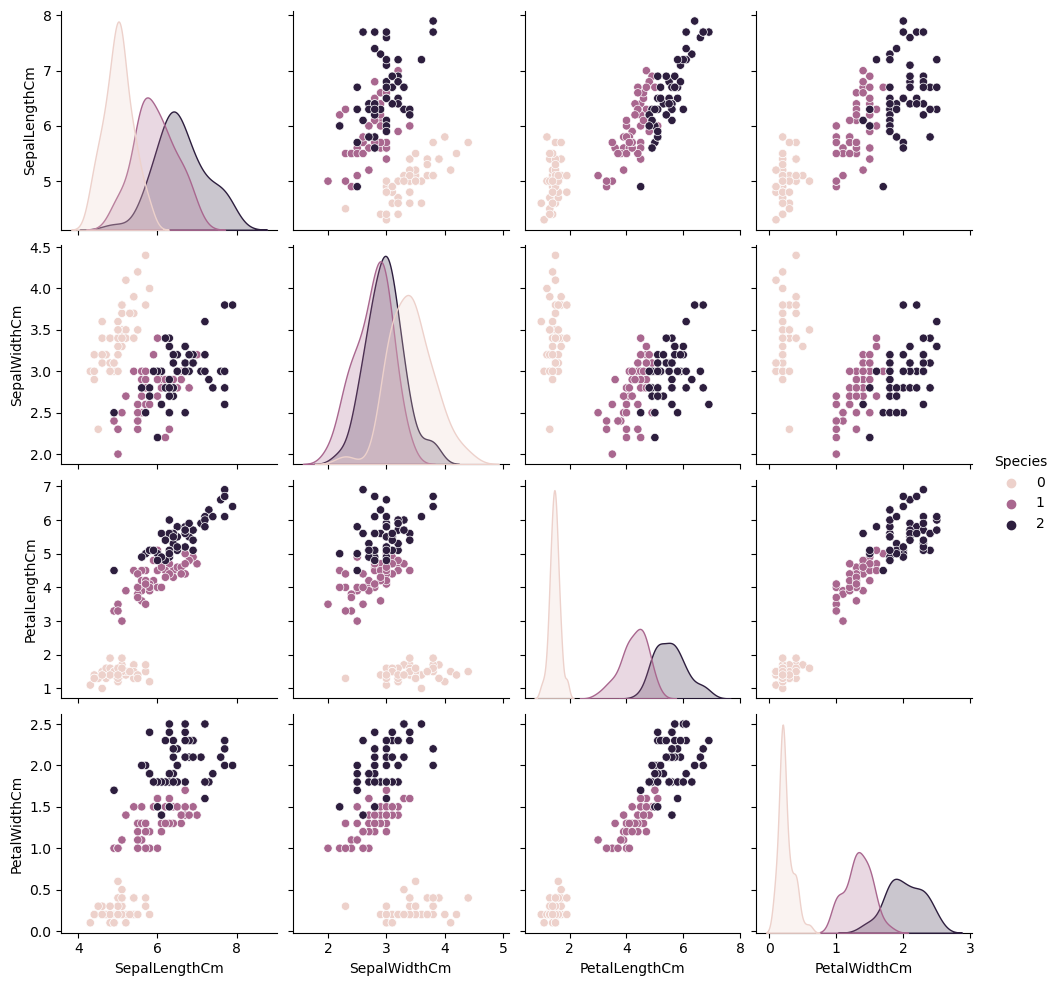

In [18]:

sns.pairplot(data_frame,hue="Species")

In [19]:
import warnings
warnings.filterwarnings("ignore")

# Now we have to split the data to training and testing 


##  we have to give input as SepalLength ,SepalWidth ,PetalLength ,PetalWidth  and get the type of Species

In [20]:
data_frame

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## generally in ML, X is denoted as input data and y is denoted as output for training data

In [21]:
from sklearn.model_selection import train_test_split

## Spliting the data 

In [22]:
X_train,X_test,y_train,y_test = train_test_split(data_frame[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],
                                                 data_frame["Species"],test_size=0.10)
print(X_train,X_test,y_train,y_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
146            6.3           2.5            5.0           1.9
99             5.7           2.8            4.1           1.3
54             6.5           2.8            4.6           1.5
73             6.1           2.8            4.7           1.2
128            6.4           2.8            5.6           2.1
..             ...           ...            ...           ...
89             5.5           2.5            4.0           1.3
125            7.2           3.2            6.0           1.8
5              5.4           3.9            1.7           0.4
105            7.6           3.0            6.6           2.1
100            6.3           3.3            6.0           2.5

[135 rows x 4 columns]      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
126            6.2           2.8            4.8           1.8
92             5.8           2.6            4.0           1.2
6              4.6           3.4            1.

# The following data comes under the classification algorithms 

Lets try different algorithm untill we get more accurancy 

# 1) Support Vector Algorithm

In [23]:
from sklearn.svm import SVC
model1 = SVC()

Model Training 

In [24]:
model1.fit(X_train,y_train)

SVC()

 Finding Accuracy 

In [25]:

print("Accuracy = ",model1.score(X_test,y_test)*100,"%",sep="")

Accuracy = 93.33333333333333%


# 2)Logistic Regression 

In [26]:
model2=linear_model.LogisticRegression()
model2.fit(X_train,y_train)

print("Acuuracy = ",model2.score(X_test,y_test)*100 ,"%",sep="")

Acuuracy = 93.33333333333333%


In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_test,y_test)
reg.predict(X_test)

print("Acuuracy = ",reg.score(X_test,y_test)*100 ,"%",sep="")

Acuuracy = 92.56335561918223%


# Summary :

Since we got 100% accurancy for Logistic Regression We use the logistic regression model for prediction Hence  iris flower classification can be done with the help Logistic Regresssion  algorithm in  Machine Learning  